In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
os.getcwd()

'C:\\Users\\I Am KD'

In [ ]:
os.chdir(r"C:\Users\I Am KD\Downloads\archive")

In [ ]:
data=pd.read_csv("heart.csv")

In [ ]:
X.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X=pd.DataFrame(data.iloc[:,:-1])


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [ ]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2


In [ ]:
Y=data['target']
Y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=100)

In [ ]:
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [ ]:
dummy=DummyClassifier()
dummy.fit(x_train,y_train)
y_pred_dum=dummy.predict(x_test)
dummy.score(x_test,y_test)

0.6043956043956044

In [ ]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(x_train,y_train);
y_pred_log=logreg.predict(x_test);


#Metrics
lr_acc_score=accuracy_score(y_test,y_pred_log)
lr_f1_score=f1_score(y_test,y_pred_log)
lr_cm=confusion_matrix(y_test,y_pred_log)

#Print Results
print("Accuracy Score :",lr_acc_score)
print("f1 Score :",lr_f1_score)
print("Confusion_Matrix :")
print(lr_cm)
print()
print("**"*10)
print("Classification Report :")
print(classification_report(y_test,y_pred_log))

Accuracy Score : 0.8241758241758241
f1 Score : 0.8620689655172413
Confusion_Matrix :
[[25 11]
 [ 5 50]]

********************
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.69      0.76        36
           1       0.82      0.91      0.86        55

    accuracy                           0.82        91
   macro avg       0.83      0.80      0.81        91
weighted avg       0.83      0.82      0.82        91



Accuracy Score : 0.7912087912087912
f1 Score : 0.819047619047619
Confusion_Matrix :
[[29  7]
 [12 43]]

********************
Classification Report :
              precision    recall  f1-score   support

           0       0.71      0.81      0.75        36
           1       0.86      0.78      0.82        55

    accuracy                           0.79        91
   macro avg       0.78      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91




[Text(0.5127840909090909, 0.95, 'cp <= -0.418\ngini = 0.499\nsamples = 211\nvalue = [102, 109]'),
 Text(0.20170454545454544, 0.85, 'oldpeak <= -0.289\ngini = 0.365\nsamples = 104\nvalue = [79, 25]'),
 Text(0.09090909090909091, 0.75, 'ca <= -0.239\ngini = 0.5\nsamples = 37\nvalue = [18, 19]'),
 Text(0.045454545454545456, 0.65, 'age <= -1.357\ngini = 0.408\nsamples = 21\nvalue = [6, 15]'),
 Text(0.022727272727272728, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.06818181818181818, 0.55, 'thalach <= -0.101\ngini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.045454545454545456, 0.45, 'exang <= 0.313\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.022727272727272728, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.06818181818181818, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.09090909090909091, 0.45, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.13636363636363635, 0.65, 'sex <= -0.478\ngini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(0

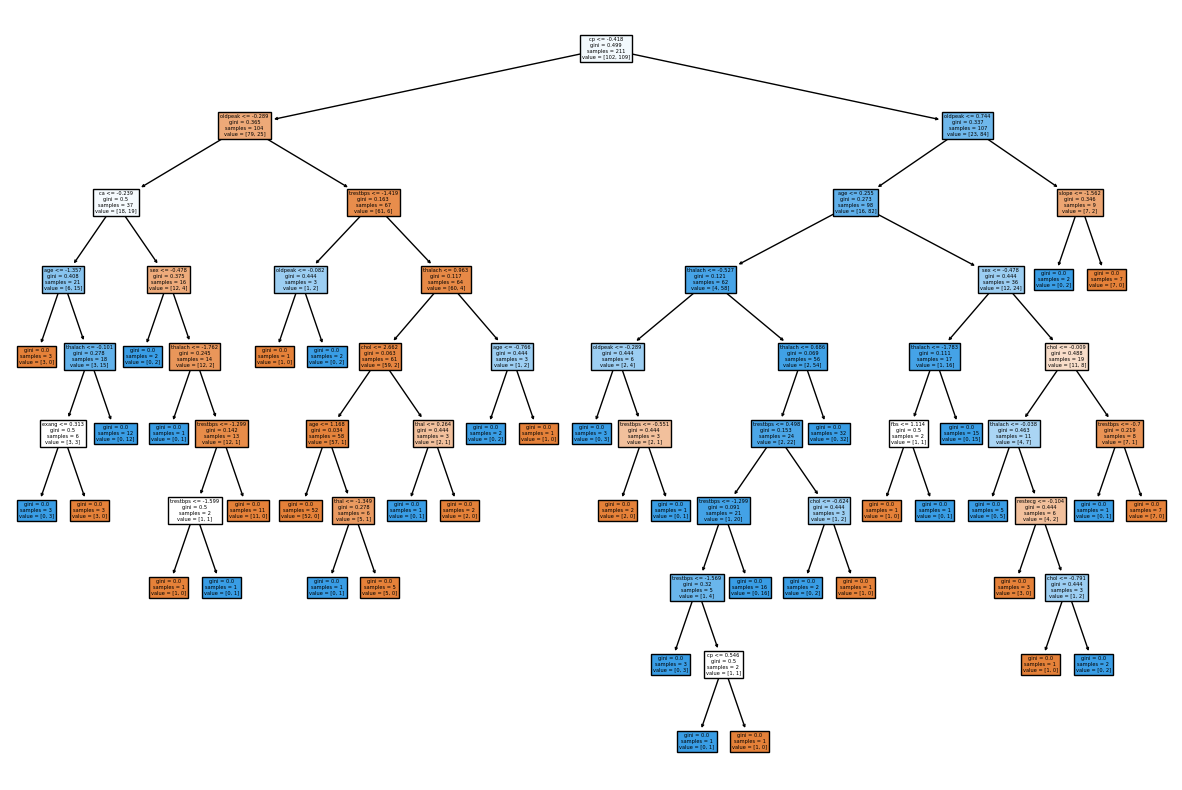

In [ ]:
#Decision Tree
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train);
y_pred_tree=tree.predict(x_test);


#Metrics
tree_acc_score=accuracy_score(y_test,y_pred_tree)
tree_f1_score=f1_score(y_test,y_pred_tree)
tree_cm=confusion_matrix(y_test,y_pred_tree)

#Print Results
print("Accuracy Score :",tree_acc_score)
print("f1 Score :",tree_f1_score)
print("Confusion_Matrix :")
print(tree_cm)
print()
print("**"*10)
print("Classification Report :")
print(classification_report(y_test,y_pred_tree))

print()
#Decision Tree Plot
tree.fit(x_train,y_train)
plt.figure(figsize=(15,10))
plot_tree(tree,filled=True,feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [ ]:
#Random Forest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train);
y_pred_rfc=rfc.predict(x_test);


#Metrics
rfc_acc_score=accuracy_score(y_test,y_pred_rfc)
rfc_f1_score=f1_score(y_test,y_pred_rfc)
rfc_cm=confusion_matrix(y_test,y_pred_rfc)

#Print Results
print("Accuracy Score :",rfc_acc_score)
print("f1 Score :",rfc_f1_score)
print("Confusion_Matrix :")
print(rfc_cm)
print()
print("**"*10)
print("Classification Report :")
print(classification_report(y_test,y_pred_rfc))



Accuracy Score : 0.8131868131868132
f1 Score : 0.8521739130434782
Confusion_Matrix :
[[25 11]
 [ 6 49]]

********************
Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        36
           1       0.82      0.89      0.85        55

    accuracy                           0.81        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.81      0.81        91



In [ ]:
#Naive Bayes Classifier
NB=GaussianNB()
NB.fit(x_train,y_train);
y_pred_NB=NB.predict(x_test);


#Metrics
NB_acc_score=accuracy_score(y_test,y_pred_NB)
NB_f1_score=f1_score(y_test,y_pred_NB)
NB_cm=confusion_matrix(y_test,y_pred_NB)

#Print Results
print("Accuracy Score :",NB_acc_score)
print("f1 Score :",NB_f1_score)
print("Confusion_Matrix :")
print(NB_cm)
print()
print("**"*10)
print("Classification Report :")
print(classification_report(y_test,y_pred_NB))



Accuracy Score : 0.7802197802197802
f1 Score : 0.8214285714285714
Confusion_Matrix :
[[25 11]
 [ 9 46]]

********************
Classification Report :
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        36
           1       0.81      0.84      0.82        55

    accuracy                           0.78        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91



In [ ]:
Prec_Table=pd.DataFrame({"Models":["DummyClassifier","Logistic Regression","Decision Tree","Random Forest","Naive Bayes Classifier"],
                         "Accuracy":[dummy.score(x_test,y_test),lr_acc_score,tree_acc_score,rfc_acc_score,NB_acc_score]})

In [ ]:
Prec_Table

,Models,Accuracy
0,DummyClassifier,0.604396
1,Logistic Regression,0.824176
2,Decision Tree,0.791209
3,Random Forest,0.813187
4,Naive Bayes Classifier,0.780220


In [ ]:
#AUC ROC CURVE

#Logistic Regression
fpr_log, tpr_log, threshold_log=roc_curve(y_test,y_pred_log)

#Decision Tree
fpr_dt, tpr_dt, threshold_dt=roc_curve(y_test,y_pred_tree)

#Random Forest
fpr_rfc, tpr_rfc, threshold_rfc=roc_curve(y_test,y_pred_rfc)

#Naive Bayes
fpr_NB, tpr_NB, threshold_NB=roc_curve(y_test,y_pred_NB)

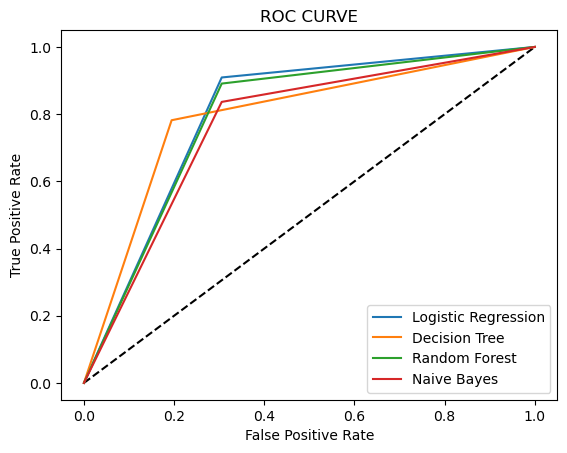

In [ ]:
#Plot AUC ROC Curve
plt.plot([0,1],[0,1],'--',color='black')
plt.plot(fpr_log,tpr_log,label="Logistic Regression")
plt.plot(fpr_dt,tpr_dt,label="Decision Tree")
plt.plot(fpr_rfc,tpr_rfc,label="Random Forest")
plt.plot(fpr_NB,tpr_NB,label="Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.title("ROC CURVE")
plt.show()